In [25]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import math
token="QWe8iSbyAFzRuod2aroM"


In [31]:
import pylab
sns.set(font_scale=2)
pylab.rcParams['figure.figsize'] = (24, 18)

In [103]:
fx_mkts={'GBP':'BP1',
         'CHF':'SF1',
         'CAD':'CD1',
         'MXN':'MP1',
         'BRL':'BR1',
         'JPY':'JY1',
         'AUD':'AD1',
         'NZD':'NE1',
         'CNH':'CNH1',
         'PLN':'PZ1',
         'EURGBP':'RP1',
         #'EURJPY':'RY1',
         'GBP':'BP1',
         'EUR':'EC1'
         
        }

In [104]:
fx_mkts.keys()

['AUD',
 'CHF',
 'GBP',
 'NZD',
 'CNH',
 'CAD',
 'JPY',
 'EURGBP',
 'MXN',
 'BRL',
 'PLN',
 'EUR']

In [105]:
price_data=pd.DataFrame()
for f in fx_mkts.keys():
    price_data[f]=quandl.get('CHRIS/CME_'+fx_mkts[f],token=token).Last
    

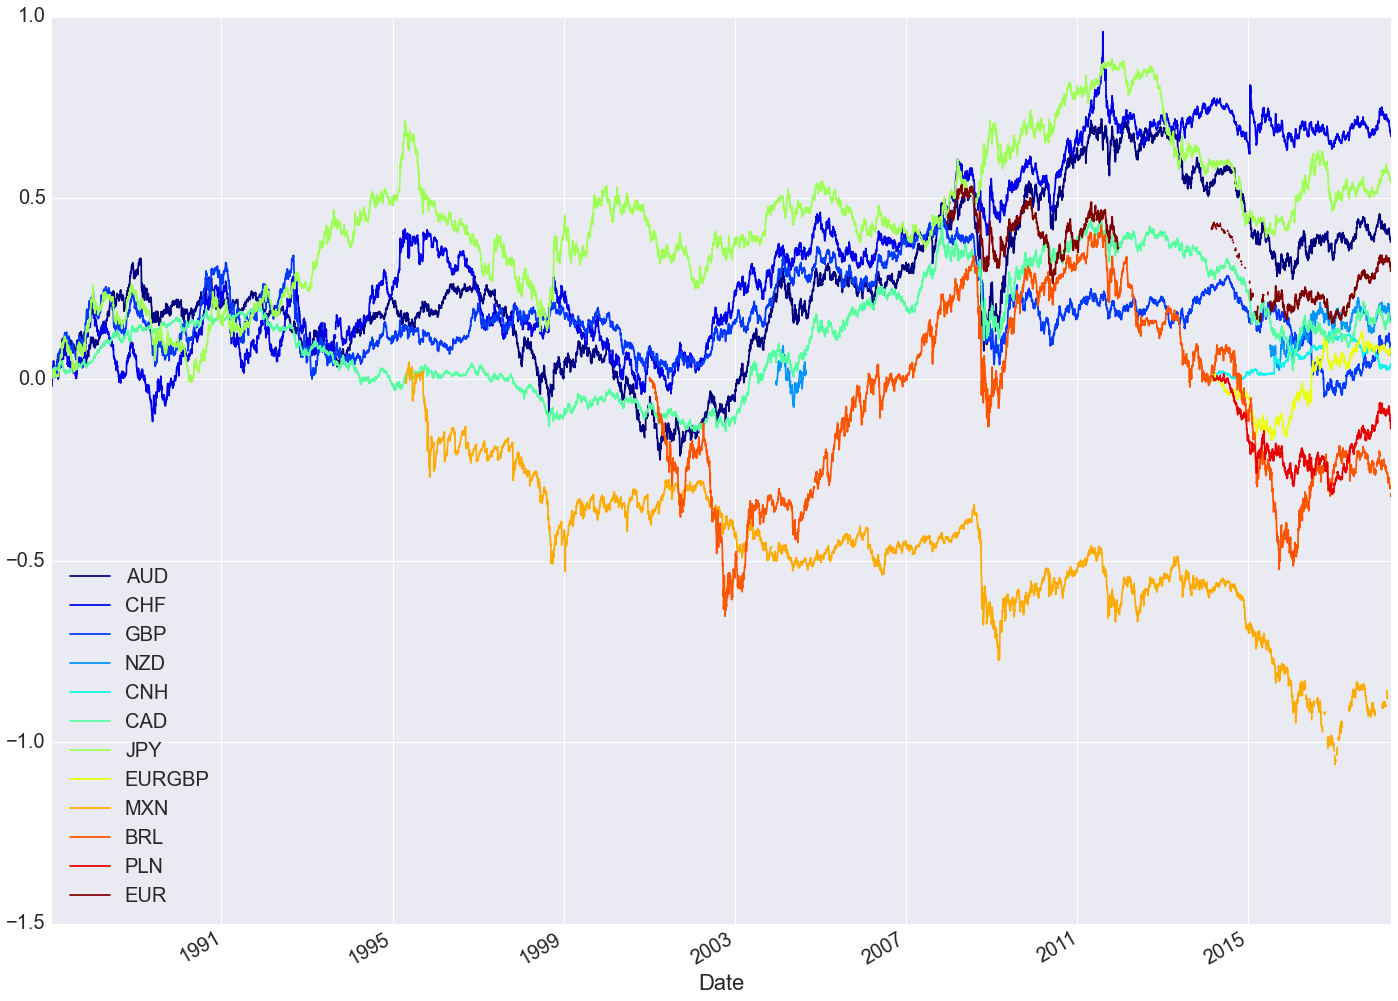

In [106]:
price_data.pct_change().cumsum().plot(colormap='jet')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """Entry point for launching an IPython kernel.


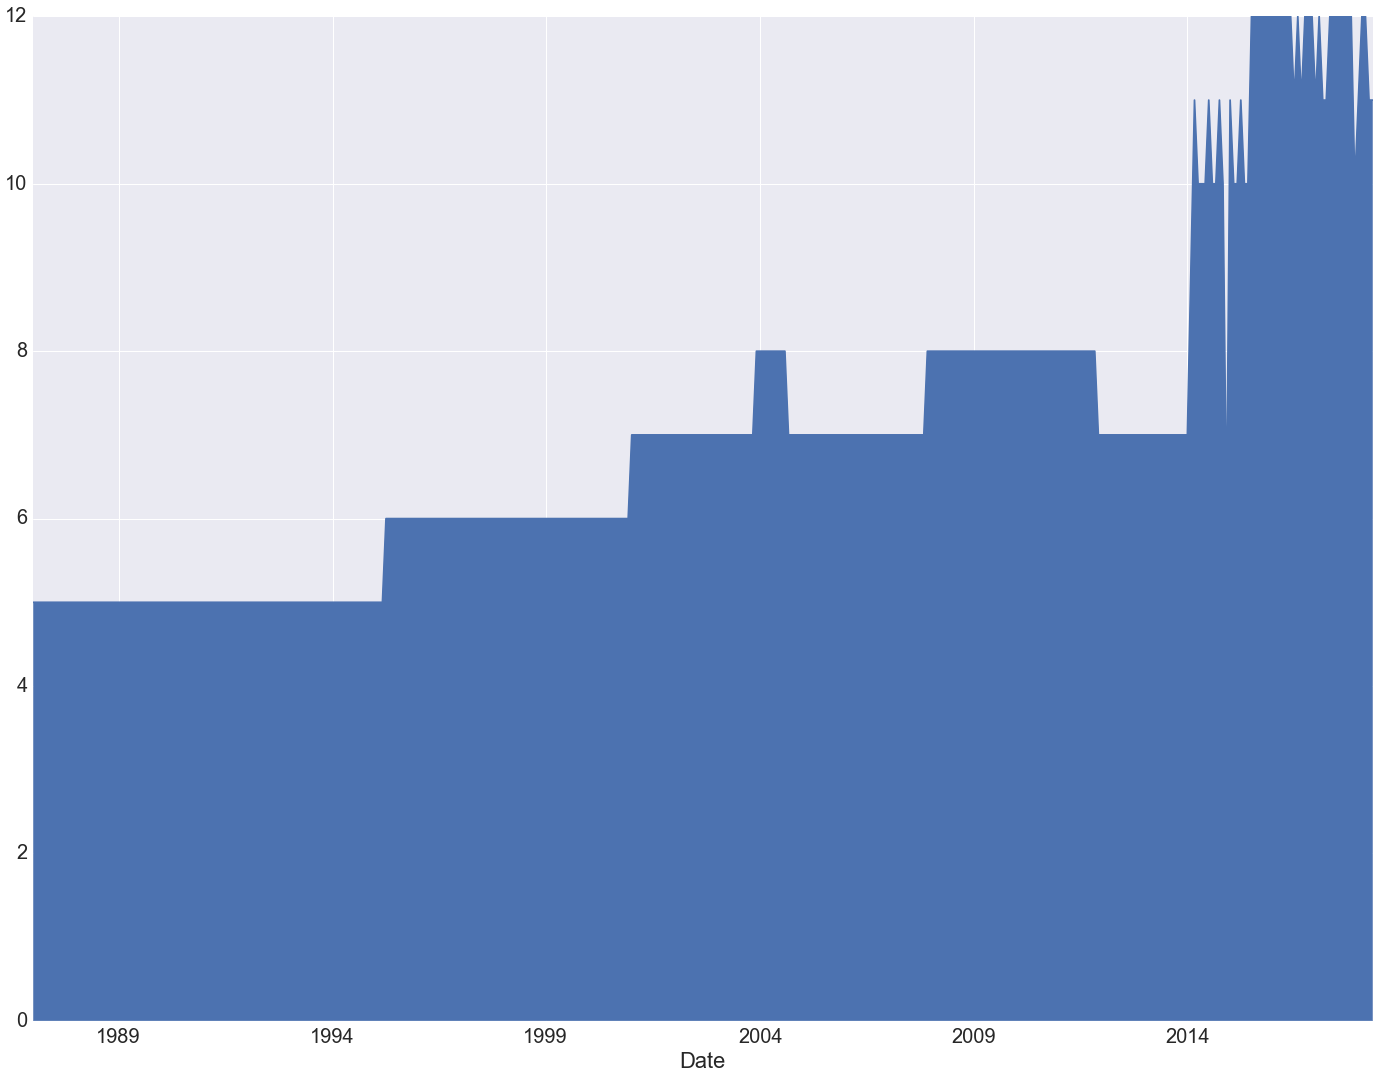

In [107]:
price_data.count(axis=1).resample(rule='m',how='last').plot(kind='area')

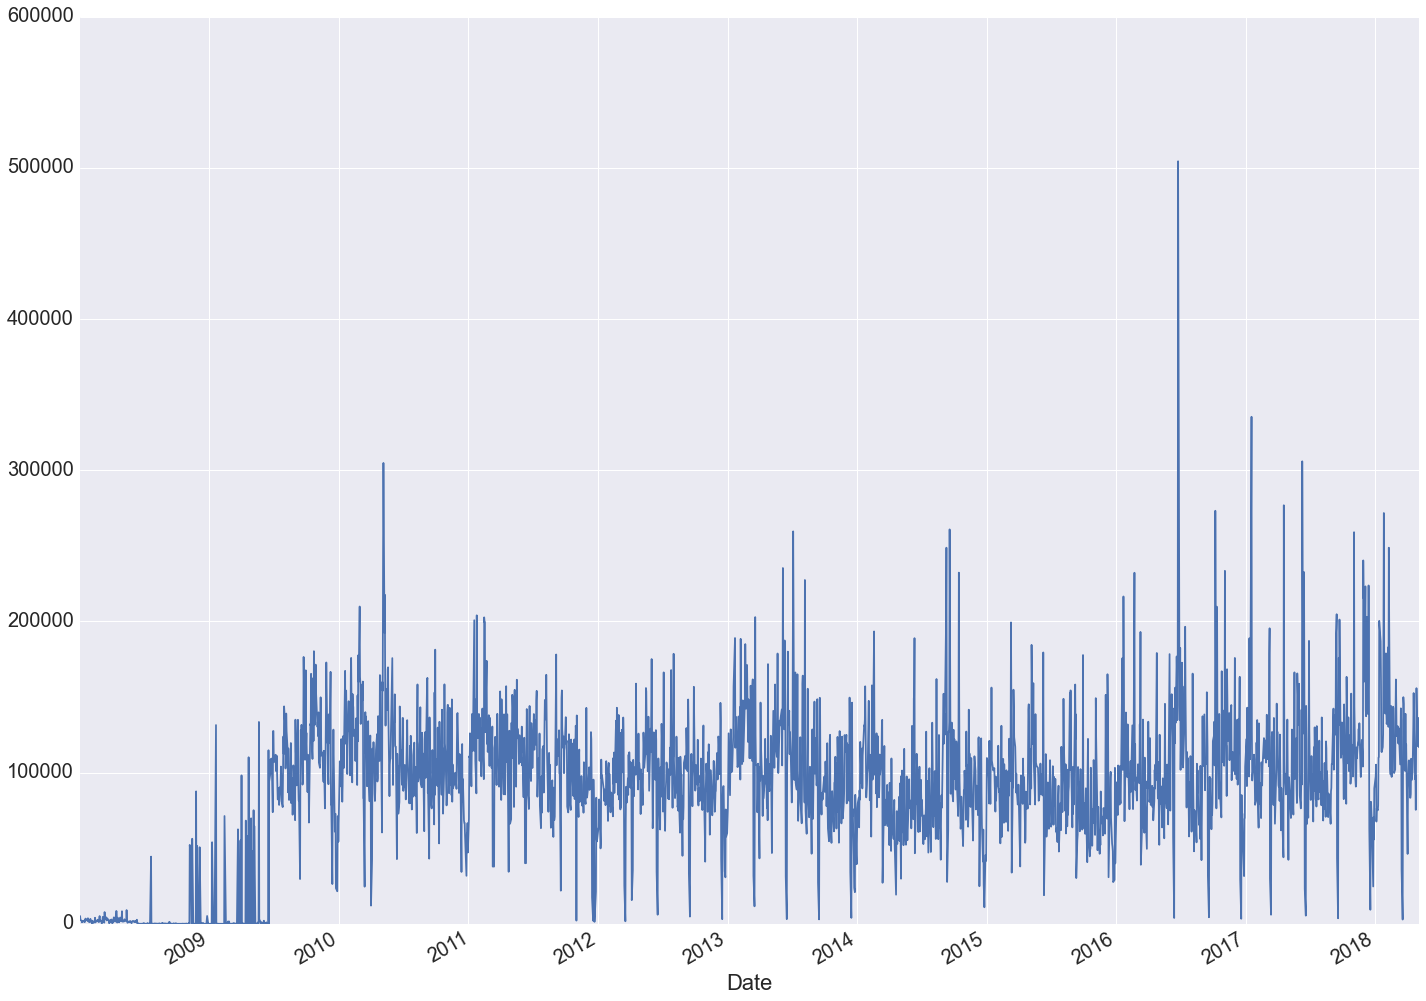

In [62]:
quandl.get('CHRIS/CME_BP1',token=token).Volume['2008':].plot()

In [55]:
price_data.head()

,AUD,CHF,GBP,NZD,CNH,CAD,JPY,EURGBP,MXN,BRL,PLN
Date,,,,,,,,,,,
1987-01-13,0.6422,0.6381,1.4800,NaN,NaN,0.7291,6452.0,NaN,NaN,NaN,NaN
1987-01-14,0.6299,0.6531,1.4915,NaN,NaN,0.7318,6569.0,NaN,NaN,NaN,NaN
1987-01-15,0.6389,0.6499,1.4925,NaN,NaN,0.7314,6538.0,NaN,NaN,NaN,NaN
1987-01-16,0.6417,0.6504,1.5080,NaN,NaN,0.7319,6541.0,NaN,NaN,NaN,NaN
1987-01-19,0.6435,0.6607,1.5225,NaN,NaN,0.7336,6629.0,NaN,NaN,NaN,NaN


In [109]:
a=pd.read_csv('../LiquidityMomentum/liquid_contracts_back_up.csv',index_col=0,parse_dates=['Date'])

In [110]:
a.count().count()

70

In [111]:
for mkt in price_data.columns:
    a[mkt]=price_data[mkt]

In [112]:
a.count().count()

82

In [113]:
a.to_csv('../LiquidityMomentum/liquid_contracts.csv')

In [114]:
vol=pd.DataFrame()
for f in fx_mkts.keys():
    vol[f]=quandl.get('CHRIS/CME_'+fx_mkts[f],token=token).Volume
    

In [117]:
a=pd.read_csv('../LiquidityMomentum/volume_data_backup.csv',index_col=0,parse_dates=['Date'])

In [118]:
a.count().count()

98

In [119]:
for mkt in vol.columns:
    a[mkt]=vol[mkt]

In [120]:
a.to_csv('../LiquidityMomentum/volume_data.csv')

In [121]:
vol.columns

Index([u'AUD', u'CHF', u'GBP', u'NZD', u'CNH', u'CAD', u'JPY', u'EURGBP',
       u'MXN', u'BRL', u'PLN', u'EUR'],
      dtype='object')

In [122]:
a.Ne


,Nasdaq,S&P MidCap 400,Russell 2000,S&P / TSX 60,EuroStoxx 50,TecDAX,Vstoxx,DAX,CAC 40,FTSE 100,...,GBP,NZD,CNH,CAD,JPY,EURGBP,MXN,BRL,PLN,EUR
Date,,,,,,,,,,,,,,,,,,,,,
1999-06-22,9250,590.0,NaN,NaN,NaN,NaN,NaN,37418.0,NaN,NaN,...,3042.0,NaN,NaN,3561.0,11349.0,NaN,3854.0,NaN,NaN,4425.0
1999-06-23,8790,1024.0,NaN,NaN,NaN,NaN,NaN,36596.0,NaN,NaN,...,23614.0,NaN,NaN,7661.0,8358.0,NaN,4501.0,NaN,NaN,8307.0
1999-06-24,5502,835.0,NaN,NaN,NaN,NaN,NaN,41417.0,NaN,NaN,...,9419.0,NaN,NaN,4504.0,9014.0,NaN,4379.0,NaN,NaN,16178.0
1999-06-25,8478,706.0,NaN,NaN,NaN,NaN,NaN,37424.0,NaN,NaN,...,4612.0,NaN,NaN,11905.0,10996.0,NaN,3990.0,NaN,NaN,9342.0
1999-06-28,6742,625.0,NaN,NaN,NaN,NaN,NaN,38163.0,NaN,NaN,...,4809.0,NaN,NaN,5326.0,7670.0,NaN,5823.0,NaN,NaN,6007.0
1999-06-29,5570,1134.0,NaN,NaN,NaN,NaN,NaN,32791.0,NaN,NaN,...,5449.0,NaN,NaN,11668.0,8111.0,NaN,4968.0,NaN,NaN,2748.0
1999-06-30,4912,1015.0,NaN,NaN,NaN,NaN,NaN,36279.0,NaN,NaN,...,4947.0,NaN,NaN,19372.0,11515.0,NaN,4646.0,NaN,NaN,5473.0
1999-07-01,2494,995.0,NaN,NaN,NaN,NaN,NaN,52434.0,NaN,NaN,...,6462.0,NaN,NaN,11899.0,16351.0,NaN,3121.0,NaN,NaN,14081.0
1999-07-02,1247,561.0,NaN,NaN,NaN,NaN,NaN,37882.0,NaN,NaN,...,4224.0,NaN,NaN,7310.0,6523.0,NaN,2727.0,NaN,NaN,5814.0
